In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
print(tf.__version__)

2.6.1


# Preprocesing of Data 


In [3]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data.csv')
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id,round
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,1
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,1
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,1
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,1
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,1


In [4]:
df = df.drop('round', 1)
df.head()

C:\Users\govindd1\AppData\Local\Temp/ipykernel_10776/2446356765.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('round', 1)


,datatime,acc_x,acc_y,acc_z,label,subject_id
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2


In [5]:
columns = ['subject_id', 'label', 'datatime', 'acc_x', 'acc_y', 'acc_z']
data = pd.DataFrame(data = df, columns = columns)
data.head()

,subject_id,label,datatime,acc_x,acc_y,acc_z
0,2,standing,2021-10-27 16:19:17+00:00,-14,22,55
1,2,standing,2021-10-27 16:19:17.031250+00:00,-4,25,61
2,2,standing,2021-10-27 16:19:17.062500+00:00,-7,21,59
3,2,standing,2021-10-27 16:19:17.093750+00:00,-15,20,59
4,2,standing,2021-10-27 16:19:17.125000+00:00,-11,22,66


In [6]:
data.shape

(137406, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137406 entries, 0 to 137405
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   subject_id  137406 non-null  int64 
 1   label       137406 non-null  object
 2   datatime    137406 non-null  object
 3   acc_x       137406 non-null  int64 
 4   acc_y       137406 non-null  int64 
 5   acc_z       137406 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.3+ MB


In [8]:
data.isnull().any()

subject_id    False
label         False
datatime      False
acc_x         False
acc_y         False
acc_z         False
dtype: bool

In [9]:
data['label'].value_counts()

walking       61546
sitting       39530
standing      23762
upstairs       7711
downstairs     4857
Name: label, dtype: int64

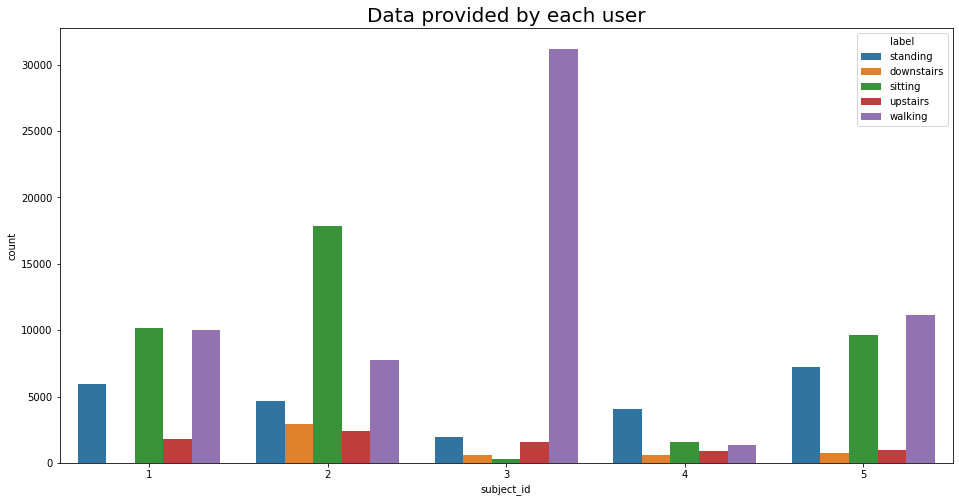

In [10]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()

# Balancing the data


In [11]:
data['acc_x'] = data['acc_x'].astype('float')
data['acc_y'] = data['acc_y'].astype('float')
data['acc_z'] = data['acc_z'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137406 entries, 0 to 137405
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   subject_id  137406 non-null  int64  
 1   label       137406 non-null  object 
 2   datatime    137406 non-null  object 
 3   acc_x       137406 non-null  float64
 4   acc_y       137406 non-null  float64
 5   acc_z       137406 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.3+ MB


In [12]:
freq = 32
activities = data['label'].value_counts().index
activities


Index(['walking', 'sitting', 'standing', 'upstairs', 'downstairs'], dtype='object')

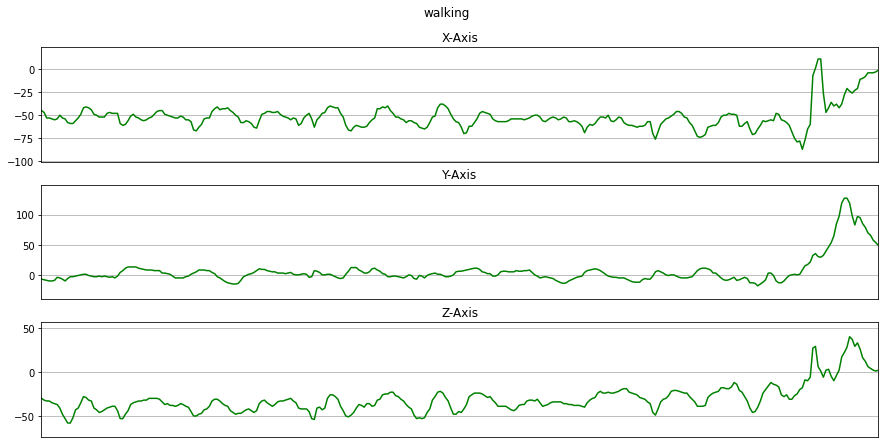

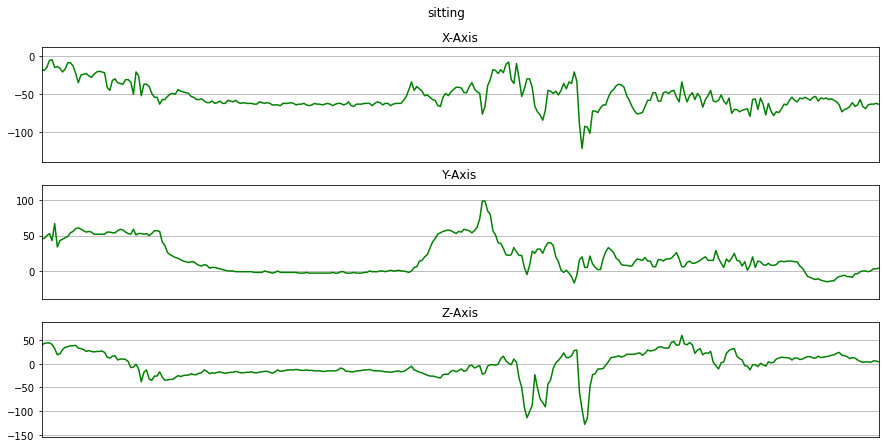

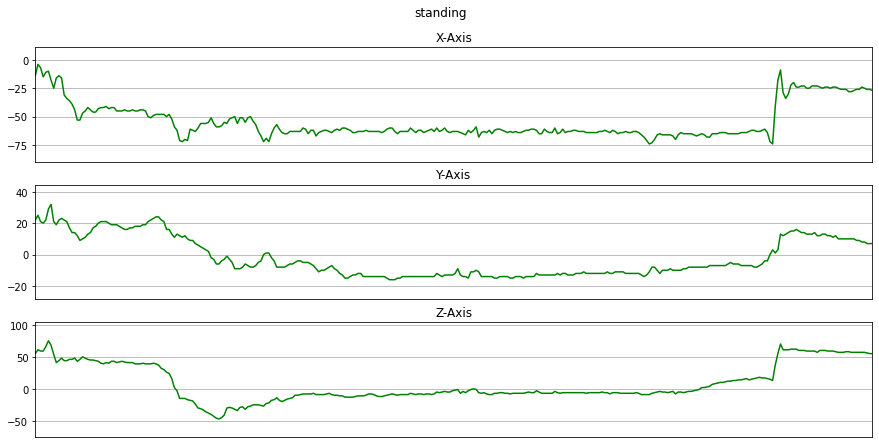

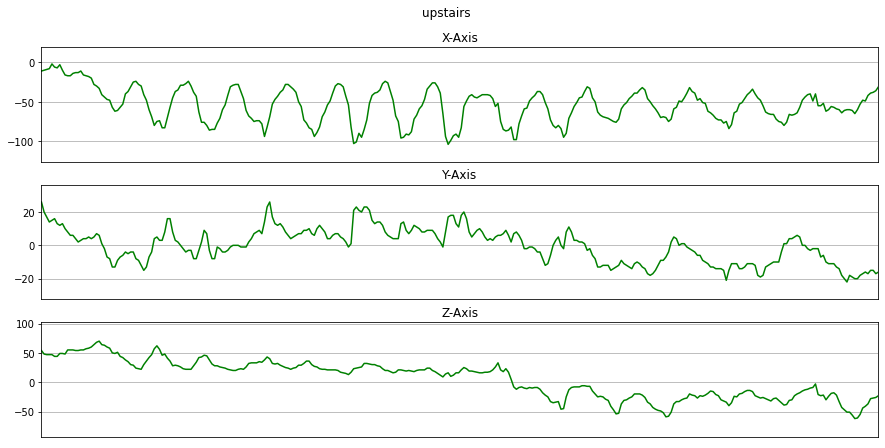

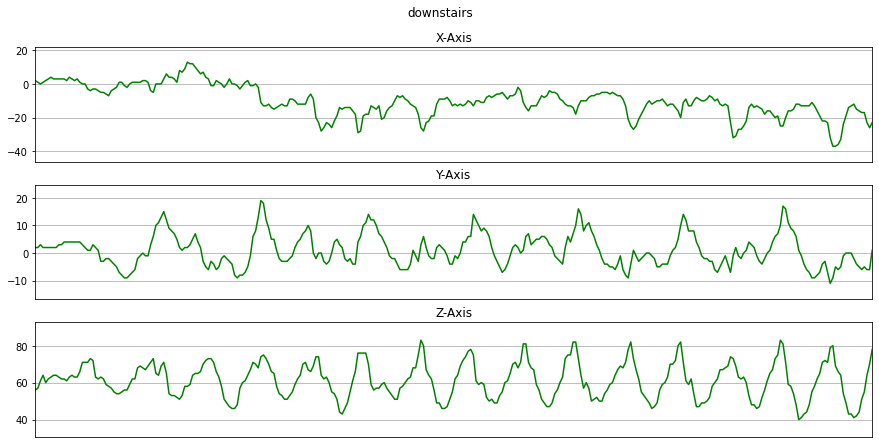

In [13]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['datatime'], data['acc_x'], 'X-Axis')
    plot_axis(ax1, data['datatime'], data['acc_y'], 'Y-Axis')
    plot_axis(ax2, data['datatime'], data['acc_z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['label'] == activity)][:freq*10]
    plot_activity(activity, data_for_plot)

In [14]:
sitting = df[df['label']=='sitting'].head(4857).copy()
standing = df[df['label']=='standing'].head(4857).copy()
walking = df[df['label']=='walking'].head(4857).copy()
upstairs = df[df['label']=='upstairs'].head(4857).copy()
downstairs = df[df['label']=='downstairs'].head(4857).copy()

In [15]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([sitting, standing, walking, upstairs, downstairs])
balanced_data.shape



(24285, 6)

In [16]:
balanced_data.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id
23609,2021-10-27 16:22:23+00:00,-18,46,39,sitting,2
23610,2021-10-27 16:22:23.031250+00:00,-19,46,43,sitting,2
23611,2021-10-27 16:22:23.062500+00:00,-15,50,44,sitting,2
23612,2021-10-27 16:22:23.093750+00:00,-6,53,44,sitting,2
23613,2021-10-27 16:22:23.125000+00:00,-5,43,41,sitting,2


In [17]:
balanced_data['label'].value_counts()

sitting       4857
standing      4857
walking       4857
upstairs      4857
downstairs    4857
Name: label, dtype: int64

In [18]:
label = LabelEncoder()
balanced_data['activity'] = label.fit_transform(balanced_data['label'])
label.classes_
# balanced_data.head()

array(['downstairs', 'sitting', 'standing', 'upstairs', 'walking'],
      dtype=object)

# standard scalar


In [19]:
balanced_data.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id,activity
23609,2021-10-27 16:22:23+00:00,-18,46,39,sitting,2,1
23610,2021-10-27 16:22:23.031250+00:00,-19,46,43,sitting,2,1
23611,2021-10-27 16:22:23.062500+00:00,-15,50,44,sitting,2,1
23612,2021-10-27 16:22:23.093750+00:00,-6,53,44,sitting,2,1
23613,2021-10-27 16:22:23.125000+00:00,-5,43,41,sitting,2,1


In [20]:
X = balanced_data[['acc_x', 'acc_y', 'acc_z']]
y = balanced_data['activity']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['acc_x', 'acc_y', 'acc_z'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2)



# ----------------------------------------------- K-Fold ------------------------------------------------


In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5 )
i = 1
for train_set, test_set in kf.split(X=X):
    print("iteration ", i)
    print(train_set, " having :" , len(train_set))
    print(test_set, " having :" , len(test_set))
    print("-------------------------")
    i += 1

iteration  1
[ 4857  4858  4859 ... 24282 24283 24284]  having : 19428
[   0    1    2 ... 4854 4855 4856]  having : 4857
-------------------------
iteration  2
[    0     1     2 ... 24282 24283 24284]  having : 19428
[4857 4858 4859 ... 9711 9712 9713]  having : 4857
-------------------------
iteration  3
[    0     1     2 ... 24282 24283 24284]  having : 19428
[ 9714  9715  9716 ... 14568 14569 14570]  having : 4857
-------------------------
iteration  4
[    0     1     2 ... 24282 24283 24284]  having : 19428
[14571 14572 14573 ... 19425 19426 19427]  having : 4857
-------------------------
iteration  5
[    0     1     2 ... 19425 19426 19427]  having : 19428
[19428 19429 19430 ... 24282 24283 24284]  having : 4857
-------------------------


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pipe = Pipeline([
    ('model', RandomForestClassifier(n_estimators=10, random_state=0))
])

In [23]:
scores = []
i = 1
for train_set, test_set in kf.split(X):
    pipe.fit(scaled_X, y)
    sco = pipe.score(scaled_X, y)
    scores.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [24]:
scores

[0.970722668313774,
 0.970722668313774,
 0.970722668313774,
 0.970722668313774,
 0.970722668313774]

# ----------------------------------------------------- other pipelines --------------------------------------------------------

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [26]:
X_train

,acc_x,acc_y,acc_z
22798,1.002471,-0.899999,1.598131
18857,-0.710138,-0.636119,1.082421
24109,0.513154,-2.131439,-0.430330
21139,-0.465479,-0.350248,0.154142
11354,1.072374,0.221492,-0.533472
...,...,...,...
2993,0.338398,-0.416218,1.666893
6435,-0.884894,0.287462,-0.877279
10848,0.373350,1.848753,-0.670995
16661,0.233545,0.925172,-0.327188


In [27]:
y_train

22122    0
72435    3
23433    0
20463    0
77500    4
        ..
26602    1
1578     2
76994    4
70239    3
1260     2
Name: activity, Length: 19428, dtype: int32

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = y_train
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        # ('cat', categorical_transformer, categorical_features)
        ])

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [30]:
rf.fit(X_train,y_train )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['acc_x', 'acc_y', 'acc_z'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [31]:
y_pred = rf.predict(X_test)
y_pred

array([1, 2, 3, ..., 0, 3, 0])

In [32]:

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    # pipe = Pipeline(steps=[('preprocessor', preprocessor),
    #                   ('classifier', classifier)])
    # pipe.fit(X_train, y_train)   
    
    kfold = 10
    results = cross_val_score(classifier, X_train, y_train, cv=kfold)
    
    print(classifier)
    # print("model score: %.3f" % pipe.score(X_test, y_test))
    print('-----------------------------CV_Results----------------------------------')
    print('Results: {}'.format(results))
    print('\nAverage acuracy: {}'.format(np.mean(results)))
    print('--------------------------------------------------------------------------------------------------------------------------')

    

C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have val

KNeighborsClassifier(n_neighbors=3)
-----------------------------CV_Results----------------------------------
Results: [0.67421513 0.67575914 0.66546577 0.66134843 0.66803911 0.68142048
 0.67215646 0.66495111 0.66838311 0.66220391]

Average acuracy: 0.6693942659301948
--------------------------------------------------------------------------------------------------------------------------
SVC(C=0.025, probability=True)
-----------------------------CV_Results----------------------------------
Results: [0.58414822 0.56510551 0.57848688 0.56098816 0.56562017 0.57539887
 0.56870818 0.58054555 0.57569516 0.5576725 ]

Average acuracy: 0.5712369206208031
--------------------------------------------------------------------------------------------------------------------------
NuSVC(probability=True)
-----------------------------CV_Results----------------------------------
Results: [0.61451364 0.59135358 0.60422028 0.58208955 0.58003088 0.60010293
 0.58826557 0.59650026 0.59938208 0.57826982]



C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid featu

AdaBoostClassifier()
-----------------------------CV_Results----------------------------------
Results: [0.50128667 0.51260937 0.52032939 0.52393206 0.49202265 0.51106536
 0.49408132 0.50283067 0.51493306 0.51029866]

Average acuracy: 0.5083389208296385
--------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
-----------------------------CV_Results----------------------------------
Results: [0.65620175 0.6392177  0.65568708 0.6392177  0.63355636 0.65414308
 0.64384972 0.65517241 0.65087539 0.63851699]

Average acuracy: 0.6466438184446213
--------------------------------------------------------------------------------------------------------------------------


#  ---------------------------------------------- shuffled K-Fold ----------------------------------------------------



In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


kfold = KFold(10)
results = cross_val_score(rfc, X_train, y_train, cv=kfold)
print('Results: {}'.format(results))
print('\nAverage acuracy: {}'.format(np.mean(results)))


Results: [0.69634586 0.67164179 0.66649511 0.69531652 0.68244982 0.67575914
 0.68502316 0.69068451 0.67868177 0.70597322]

Average acuracy: 0.6848370898093079


In [90]:
from sklearn.model_selection import StratifiedKFold 


skfold = StratifiedKFold(10)
results = cross_val_score(rfc, X_train, y_train, cv=skfold)
print('Results: {}'.format(results))
print('\nAverage acuracy: {}'.format(np.mean(results)))


Results: [0.69840453 0.6731858  0.65723109 0.70458055 0.67884714 0.67987648
 0.69274318 0.68244982 0.68434604 0.70288363]

Average acuracy: 0.6854548239660393
